In [39]:
import pandas as pd
import numpy as np

In [40]:
df_raw = pd.read_csv("raw/Camels_chem_1980_2018.csv")
df_raw.columns

Index(['gauge_id', 'rec_id', 'gauge_name', 'region_id', 'region_name', 'cl',
       'na', 'k', 'mg', 'si', 'al', 'ton', 'tdn', 'no3', 'so4', 'ca', 'temp',
       'doc', 'dic', 'toc', 'ph', 'ph2', 'alk', 'hco3', 'o', 'don', 'total_cl',
       'total_no3', 'total_so4', 'q_inst', 'q_15', 'q_derived', 'q_daily',
       'q_derived_note', 'q_daily_cd', 'q_inst_cd', 'q_15_cd',
       'measure_unit_code', 'sample_start_dt', 'sample_start_time',
       'sample_timestamp', 'q_inst_ts', 'q_15_ts', 'inserted_ts',
       'updated_ts'],
      dtype='object')

In [41]:
feature_names = ['cl', 'na', 'k', 'mg', 'si', 'al', 'ton', 'tdn', 'no3', 'so4', 'ca', 'temp', 'doc', 'dic', 'toc', 'ph', 'ph2', 'alk', 'hco3', 'o', 'don']

In [42]:
temp = df_raw.loc[:, feature_names + ['gauge_id', 'sample_start_dt']]
temp = temp.assign(year_month=pd.to_datetime(temp.sample_start_dt).map(lambda x: x.strftime('%Y-%m'))).drop("sample_start_dt", axis=1)

In [43]:
temp2 = temp.groupby(['gauge_id', 'year_month']).count()
temp2.loc[(temp2>2).any(axis=1)]

cl  na  k  mg  si  al  ton  tdn  no3  so4  ...  temp  \
gauge_id year_month                                             ...         
1022500  1983-12      1   0  0   0   0   0    0    0    0    1  ...     3   
1031500  1994-02      0   0  0   0   0   0    0    0    0    0  ...     3   
1054200  1992-04      1   1  1   1   1   1    0    0    0    1  ...     2   
         1992-08      1   1  1   1   1   1    0    0    0    1  ...     7   
         1993-05      1   1  1   1   1   1    0    0    0    1  ...     3   
...                  ..  .. ..  ..  ..  ..  ...  ...  ...  ...  ...   ...   
14301000 1992-08      1   1  1   1   1   0    0    0    1    1  ...    11   
         1993-01      1   1  1   1   1   1    0    0    1    1  ...    11   
         1993-08      1   1  1   1   1   1    0    0    1    1  ...     6   
14316700 1995-07      1   0  0   0   1   0    0    0    0    0  ...     3   
         2005-07      0   0  0   0   0   0    0    0    0    0  ...     3   

                     doc  dic  toc  ph  ph2  alk  hco3   o  don  
gauge_id year_month                                              
1022500  1983-12       0    0    0   0    1    0     0   1    0  
1031500  1994-02       0    0    0   0    0    0     0   0    0  
1054200  1992-04       0    0    0   3    0    0     0   2    0  
         1992-08       0    0    0   4    1    0     1   4    0  
         1993-05       0    0    0   4    1    0     1   3    0  
...                  ...  ...  ...  ..  ...  ...   ...  ..  ...  
14301000 1992-08       0    0    0  11    1    0     1  11    0  
         1993-01       0    0    0  11    1    0     1  11    0  
         1993-08       0    0    0   6    1    0     1   6    0  
14316700 1995-07       0    0    0   3    0    0     1   3    0  
         2005-07       0    0    0   3    0    0     0   3    0  

[3492 rows x 21 columns]

In [44]:
temp3 = temp.fillna(np.inf).groupby(['gauge_id', 'year_month']).mean().replace(np.inf, np.nan)
temp3

cl   na    k   mg    si  al   ton  tdn  no3  so4  ...  \
gauge_id year_month                                                     ...   
1013500  1980-01     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
         1980-02     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
         1980-04     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
         1980-05     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
         1980-06     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...   ...  ..   ...  ...  ...  ...  ...   
14306500 1986-04     3.8  4.7  0.8  1.5  13.0 NaN  0.59  NaN  0.3  1.5  ...   
         1986-08     NaN  NaN  NaN  NaN   NaN NaN  0.26  NaN  0.1  NaN  ...   
14316700 1995-07     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
         2005-07     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   
         2007-08     NaN  NaN  NaN  NaN   NaN NaN   NaN  NaN  NaN  NaN  ...   

                          temp  doc  dic  toc        ph  ph2  alk  hco3  \
gauge_id year_month                                                       
1013500  1980-01           NaN  NaN  NaN  NaN       NaN  NaN  NaN   NaN   
         1980-02      0.000000  NaN  NaN  NaN       NaN  NaN  NaN   NaN   
         1980-04           NaN  NaN  NaN  NaN       NaN  NaN  NaN   NaN   
         1980-05           NaN  NaN  NaN  NaN       NaN  NaN  NaN   NaN   
         1980-06           NaN  NaN  NaN  NaN       NaN  NaN  NaN   NaN   
...                        ...  ...  ...  ...       ...  ...  ...   ...   
14306500 1986-04      8.100000  NaN  NaN  NaN  8.100000  7.7  NaN   NaN   
         1986-08     20.200000  NaN  NaN  NaN  7.400000  NaN  NaN   NaN   
14316700 1995-07     20.766667  NaN  NaN  NaN  8.233333  NaN  NaN   NaN   
         2005-07     21.966667  NaN  NaN  NaN  8.433333  NaN  NaN   NaN   
         2007-08     20.700000  NaN  NaN  NaN  8.400000  NaN  NaN   NaN   

                             o  don  
gauge_id year_month                  
1013500  1980-01           NaN  NaN  
         1980-02           NaN  NaN  
         1980-04           NaN  NaN  
         1980-05           NaN  NaN  
         1980-06           NaN  NaN  
...                        ...  ...  
14306500 1986-04     11.700000  NaN  
         1986-08      7.900000  NaN  
14316700 1995-07      8.833333  NaN  
         2005-07      9.900000  NaN  
         2007-08      9.700000  NaN  

[54122 rows x 21 columns]

In [45]:
full_index = pd.MultiIndex.from_product([temp.gauge_id.unique(), np.sort(temp.year_month.unique())], names=['gauge_id', 'year_month'])
df_full = temp3.reindex(full_index, fill_value=np.NaN)

In [57]:
(df_full < 0).sum()

cl      0
na      0
k       0
mg      0
si      0
al      0
ton     0
tdn     0
no3     0
so4     0
ca      0
temp    0
doc     0
dic     0
toc     0
ph      0
ph2     0
alk     0
hco3    0
o       0
don     0
dtype: int64

In [56]:
df_full.temp = df_full.temp - df_full.temp.min()

In [47]:
(df_full > 0).mean()

cl      0.061746
na      0.056781
k       0.056023
mg      0.059378
si      0.048392
al      0.013707
ton     0.028382
tdn     0.009760
no3     0.030420
so4     0.058665
ca      0.059167
temp    0.201393
doc     0.017748
dic     0.000004
toc     0.015450
ph      0.097587
ph2     0.053734
alk     0.001213
hco3    0.014021
o       0.078310
don     0.009822
dtype: float64

In [48]:
gauge_timerange = df_full['o']\
    .dropna(axis=0, how="all")\
        .reset_index()\
            .groupby("gauge_id")['year_month']\
                .agg(['min', 'max', 'count'])\
                    .rename(columns={'min': 'time_start', 'max': 'time_end', 'count': 'ncount'})

In [65]:
gauge_timerange[(gauge_timerange.time_start >= '2006-01') & (gauge_timerange.ncount >= 10)]

,time_start,time_end,ncount
gauge_id,,,
1195100,2007-10,2018-12,134
1544500,2011-10,2018-12,74
1548500,2010-10,2015-09,54
1549500,2010-10,2015-09,57
1632900,2010-04,2018-12,104
4122200,2008-05,2011-10,21
6352000,2009-04,2018-10,38
6919500,2008-10,2014-09,71
9065500,2009-09,2018-11,56


In [66]:
gauge_timerange[(gauge_timerange.time_end < '2006-01') & (gauge_timerange.ncount >= 10)]

,time_start,time_end,ncount
gauge_id,,,
1022500,1980-07,1986-08,13
1134500,2002-12,2005-08,30
1137500,1993-03,1995-09,12
1142500,2003-01,2005-08,28
1144000,1993-05,2005-08,40
...,...,...,...
12414500,1989-07,2001-09,42
12447390,1980-02,2001-09,78
13018300,1980-01,2002-08,103


In [67]:
gauge_timerange[(gauge_timerange.time_end >= '2006-01') & (gauge_timerange.time_start < '2006-01') & (gauge_timerange.ncount >= 10)]

,time_start,time_end,ncount
gauge_id,,,
1054200,1980-01,2018-12,48
1170100,1993-05,2018-12,149
1411300,1980-02,2011-06,23
1439500,1999-05,2018-11,113
1440000,1992-10,2018-11,95
...,...,...,...
12056500,1980-01,2018-11,158
13235000,1991-11,2008-09,35
13313000,1991-11,2008-09,32


In [52]:
gauge_timerange.to_csv("processed/monthly_metadata.csv")

In [58]:
df_full.to_csv("processed/monthly.csv")

In [183]:
pd.concat([
    df_full.temp,
    df_full.drop('temp', axis=1).transform(lambda x: np.log10(x + 0.01))
], axis=1)

temp  cl  na   k  mg  si  al  ton  tdn  no3  ...  ca  \
gauge_id year_month                                               ...       
1013500  1980-01      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         1980-02      0.0 NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         1980-03      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         1980-04      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         1980-05      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
...                   ...  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ..   
14301000 2018-08      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         2018-09      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         2018-10      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         2018-11      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   
         2018-12      NaN NaN NaN NaN NaN NaN NaN  NaN  NaN  NaN  ... NaN   

                     doc  dic  toc  ph  ph2  alk  hco3   o  don  
gauge_id year_month                                              
1013500  1980-01     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         1980-02     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         1980-03     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         1980-04     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         1980-05     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
...                  ...  ...  ...  ..  ...  ...   ...  ..  ...  
14301000 2018-08     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         2018-09     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         2018-10     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         2018-11     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  
         2018-12     NaN  NaN  NaN NaN  NaN  NaN   NaN NaN  NaN  

[161460 rows x 21 columns]

<Axes: >

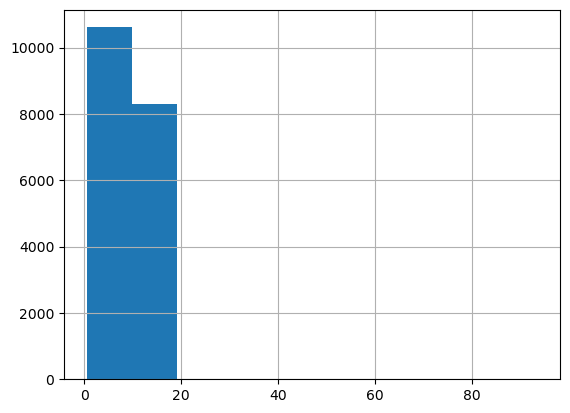

In [60]:
df_full.o.hist()